###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c) 2019 Daniel Koehn, based on (c)2018 L.A. Barba, G.F. Forsyth [CFD Python](https://github.com/barbagroup/CFDPython#cfd-python), (c)2014 L.A. Barba, I. Hawke, B. Knaepen [Practical Numerical Methods with Python](https://github.com/numerical-mooc/numerical-mooc#practical-numerical-methods-with-python), also under CC-BY.

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# 2D Boundary Value Problem Example: Thermal Convection in the Earth Mantle

Let's take a look at a more complex boundary value problem - stationary solutions for 2D thermal mantle convection.

## Thermal Convection in the Earth Mantle

We already derived the governing equations for thermal convection in [lecture 3](https://danielkoehnsite.files.wordpress.com/2019/11/lect_03_simple_convection_lorenz_eqs-1.pdf) , when investigating the complex dynamics of the [Lorenz equations](https://github.com/daniel-koehn/Differential-equations-earth-system/tree/master/03_Lorenz_equations#lecture-3-simplified-convection-problem-the-lorenz-equations). Let's shortly revisit the basic results:

The full coupled set of scaled PDE's describe the coupling of incompressible 2D Navier Stokes flow with an advection-diffusion equation for temperature, and can be written in dimensionless form as,

$$ 
   \frac{1}{\mathrm{Pr}}\left[ \frac{\partial \omega}{\partial t} + \vec{v}\cdot\nabla\omega\right] = \nabla^2\omega + \mathrm{Ra}\frac{\partial T}{\partial x}
$$
$$
    \nabla^2 \psi = -\omega
$$
$$ 
    \frac{\partial T}{\partial t} + \vec{v}\cdot\nabla T = \nabla^2 T
$$

where

$$
    \vec{v}=(u,0,w) = \nabla\times\psi\hat{j}=(\frac{\partial\psi}{\partial z}, 0,  -\frac{\partial\psi}{\partial x})
$$ 

is the fluid velocity field (which in this form is exactly incompressible with $\nabla\cdot\vec{v}=0$).  $\psi$ is the "Streamfunction"  whose contours are tangent to the fluid trajectories at all times.  The vorticity,

$$
    \omega = \bf{\vec{\omega} \cdot \hat{j}} = (\nabla\times\vec{v}) \cdot \hat{j}
$$ 

measures the local rate of rotation of the fluid, and is driven by horizontal variations in temperature (actually density). $\hat{j}=(0,1,0)^T$ denotes the unit vector in y-direction.

Now, if we are dealing with mantle convection, the Prandtl number Pr becomes very large, actually it can be assumed to be inifinite. Therefore, the governing equations simplify to

\begin{equation}
\begin{split}
\nabla^2\omega &=  - \mathrm{Ra}\frac{\partial T}{\partial x} \\
\nabla^2 \psi &= -\omega \\
\nabla^2 T &= \frac{\partial T}{\partial t} + \vec{v}\cdot\nabla T
\end{split} \tag{1}
\end{equation}

Next, we want to focus on finding **stationary solutions** or **fixpoints** of the PDEs describing 2D thermal mantle convection. This problem should already be familiar for you, because we extensively discussed fixpoints, when calculating [stationary solutions of the Lorenz equations](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/03_Lorenz_equations/02_Stationary_solutions_of_DE.ipynb). Fixpoints are calculated by setting all time derivatives in eqs. (1) to zero, leading to:

\begin{equation}
\begin{split}
\nabla^2\omega &=  - \mathrm{Ra}\frac{\partial T}{\partial x} \\
\nabla^2 \psi &= -\omega \\
\nabla^2 T &= \vec{v}\cdot\nabla T
\end{split} \tag{2}
\end{equation}

By inserting the definition of the velocity vector $\vec{v}=(u,0,w) =(\frac{\partial\psi}{\partial z}, 0,  -\frac{\partial\psi}{\partial x})$ using the streamfunction in eqs. (2), we get

\begin{equation}
\begin{split}
\nabla^2\omega &=  - \mathrm{Ra}\frac{\partial T}{\partial x} \\
\nabla^2 \psi &= -\omega \\
\nabla^2 T &= \frac{\partial\psi}{\partial z} \frac{\partial T}{\partial x} - \frac{\partial\psi}{\partial x} \frac{\partial T}{\partial z}
\end{split} \tag{3}
\end{equation}

Now, take a closer look at eqs. (3). Do you notice the three Poisson equations with Laplace operators on the LHS $Ap$ and some more complex terms on the RHS $b$. So each subproblem can be written as matrix equation:

$$
Ap = b
$$

The difference between problem (3) and the Poisson problems discussed in the previous notebooks, is that the Poisson equations are coupled. 

### Numerical Solution of the 2D thermal mantle convection boundary value problem

Time to solve eqs. (3) using the [steepest descent method](http://nbviewer.ipython.org/urls/github.com/daniel-koehn/Differential-equations-earth-system/tree/master/07_BVP_2D/04_Conjugate_Gradient.ipynb). Starting from initial fields $(\omega_0,\psi_0,T_0)$, the iterative algorithm can be summarized at each iteration step $n$ as 

1. Update the vorticity $\omega^{(n+1)}$ from the previous temperature field $T^{(n)}$ by solving the Poisson equation

$$
\nabla^2\omega^{(n+1)} =  - \mathrm{Ra}\frac{\partial T^{(n)}}{\partial x}
$$

2. Update the streamfunction $\psi^{(n+1)}$ based on the new vorticity $\omega^{(n+1)}$ by solving the Poisson equation

$$
\nabla^2 \psi^{(n+1)} = -\omega^{(n+1)}
$$

3. Update the temperature field $T^{(n+1)}$ from the new streamfunction $\psi^{(n+1)}$ by solving the Poisson equation

$$
\nabla^2 T^{(n+1)} = \frac{\partial\psi^{(n+1)}}{\partial z} \frac{\partial T^{(n)}}{\partial x} - \frac{\partial\psi^{(n+1)}}{\partial x} \frac{\partial T^{(n)}}{\partial z}
$$

4. Test for convergence:

\begin{equation}
\begin{split}
E_T^{(n+1)} &= \frac{||T^{(n+1)}-T^{(n)}||}{||T^{(n+1)}||}\\
E_{\psi}^{(n+1)} &= \frac{||\psi^{(n+1)}-\psi^{(n)}||}{||\psi^{(n+1)}||}\\
\end{split} \notag
\end{equation}

5. If $E_T^{(n+1)} \le \epsilon_{T}$ and $E_\psi^{(n+1)} \le \epsilon_{\psi}$ are satisfied, stop the iteration, otherwise continue step 1.

It's coding time. As usual, we start by importing some basic Python libraries and set up the plotting environment.

In [2]:
# Import libraries
import numpy
from matplotlib import pyplot
%matplotlib inline

# import JIT from Numba
from numba import jit

# import Numpy Linear Algebra package 
from numpy import linalg as LA

In [3]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

For the steepest descent method, we need a function to compute the action of the Laplace operator $\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial z^2}$ on an abritary field $u$. In `Alapl` the second derivatives are apprximated by the three-point central operator:

In [4]:
# Compute Laplace operator applied to scalar field u
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def Alapl(u,nx,nz,dx2,dz2):
    
    A = numpy.zeros_like(u)
    
    # loop over spatial grid 
    for i in range(1,nx-1):
        for j in range(1,nz-1):                
                
            # Compute Laplace operator for scalar field u
            d2udx2 = (u[j, i+1] + u[j, i-1] - 2 * u[j, i]) / dx2
            d2udz2 = (u[j+1, i] + u[j-1, i] - 2 * u[j, i]) / dz2                                 
                            
            A[j, i] = d2udx2 + d2udz2
            
    return A         

Next, we have to define the RHS $b$ for the vorticity equation `bw` ...

In [5]:
# Compute b for vorticity equation
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def bw(T,nx,nz,dx,Ra):
    
    b = numpy.zeros_like(T)
    
    # loop over spatial grid 
    for i in range(1,nx-1):
        for j in range(1,nz-1):                
                
            # Compute b for vorticity equation
            dTdx = - Ra * (T[j,i+1] - T[j,i]) / dx                                 
                            
            b[j, i] = dTdx
            
    return b

... and the temperature equation `bT`

In [6]:
# Compute b for temperature equation
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def bT(T,psi,nx,nz,dx,dz):
    
    b = numpy.zeros_like(T)
    
    # loop over spatial grid 
    for i in range(1,nx-1):
        for j in range(1,nz-1):                
                
            # Compute b for temperature equation
            dTdx = (T[j,i+1] - T[j,i]) / dx
            dTdz = (T[j+1,i] - T[j,i]) / dz
        
            dpsidx = (psi[j,i+1] - psi[j,i]) / dx
            dpsidz = (psi[j+1,i] - psi[j,i]) / dz                                
                            
            b[j, i] = dpsidz * dTdx - dpsidx * dTdz
            
    return b

Next, we can solve the governing eqs. (3) using the iterative numerical method described above with the steepest descent method in the function `mantle_convection_bvp`

In [7]:
# 2D thermal mantle convection code with JIT optimization
# -------------------------------------------------------
def mantle_convection_bvp(T0, psi0, w0, niter, dx, dz, Ra, tol):
    """
    Computes and returns the stationary temperature, streamfunction 
    and vorticity fields for the 2D thermal mantle convection problem 
    using the steepest descent method.
    
    Parameters
    ----------
    T0 : numpy.ndarray
        The initial temperature distribution as a 2D array of floats.
    psi0 : numpy.ndarray
        The initial streamfunction as a 2D array of floats.    
    w0 : numpy.ndarray
        The initial vorticity as a 2D array of floats.    
    niter : integer
        Maximum number of iterations using the steepest descent method.    
    dx : float
        Grid spacing in the x direction.
    dz : float
        Grid spacing in the z direction.
    Ra : float
        Rayleigh number.
    tol : float
        tolerance for abortion criterion.
    
    
    Returns
    -------
    T : numpy.ndarray
        The temperature distribution as a 2D array of floats.
    psi : numpy.ndarray
        The streamfunction as a 2D array of floats.    
    w : numpy.ndarray
        The vorticity as a 2D array of floats.    
    """
    
    # Define some constants.
    dx2 = dx**2
    dz2 = dz**2
    
    # Copy fields
    T = T0.copy()
    psi = psi0.copy()
    w = w0.copy()
    
    r = numpy.zeros_like(psi)    # initial residuals
    Ar = numpy.zeros_like(psi)   # store mat-vec multiplication Ar
    
    # Estimate number of grid points in x- and y-direction
    nz, nx = T.shape
    
    # Stabilization factor eps 
    eps = 0.
    
    # Iterate solution using the steepest descent method
    for n in range(niter):
        
        # 1. Compute new vorticity from previous temperature
        # --------------------------------------------------
        # store old T
        wk = w.copy()
        
        # Compute the residual.
        r = bw(T,nx,nz,dx,Ra) - Alapl(w,nx,nz,dx2,dz2)
        
        # Compute the Laplacian of the residual.
        Ar = Alapl(r,nx,nz,dx2,dz2)
        
        # Compute the step size.
        alpha = numpy.sum(r * r) / (numpy.sum(r * Ar) + eps)
        
        # Update the vorticity solution.
        w = wk + alpha * r
        
        # 2. Compute new streamfunction from new vorticity
        # ------------------------------------------------
        # store old T
        psik = psi.copy()
        
        # Compute the residual.
        r = - w - Alapl(psi,nx,nz,dx2,dz2)
        
        # Compute the Laplacian of the residual.
        Ar = Alapl(r,nx,nz,dx2,dz2)
        
        # Compute the step size.
        alpha = numpy.sum(r * r) / (numpy.sum(r * Ar) + eps)
        
        # Update the streamfunction solution.
        psi = psik + alpha * r
        
        # 3. Compute new temperature from new streamfunction
        # --------------------------------------------------
        # store old T
        Tk = T.copy()
        
        # Compute the residual.
        r = bT(T,psi,nx,nz,dx,dz) - Alapl(T,nx,nz,dx2,dz2)
        
        # Compute the Laplacian of the residual.
        Ar = Alapl(r,nx,nz,dx2,dz2)
        
        # Compute the step size.
        alpha = numpy.sum(r * r) / (numpy.sum(r * Ar) + eps)
        
        # Update the temperature solution.
        T = Tk + alpha * r
        
        # Apply Neumann boundary condition (dTdx=0) at left and right boundary
        T[:,0] = T[:,1]
        T[:,-1] = T[:,-2]
        
        # Compute relative L2 norm of temperature and streamfunction 
        ET = LA.norm(T-Tk, 2) / LA.norm(T, 2)
        Epsi = LA.norm(psi-psik, 2) / LA.norm(psi, 2)
        
        # check if tolerance criterion is satisfied
        if(max(ET,Epsi) <= tol):
            print("ET = ", ET)
            print("Final Epsi = ", Epsi)
            print("n = ", n)
            break
        
        if(n==niter-1):
            print("Final ET = ", ET)
            print("Final Epsi = ", Epsi)
            
    return T, w, psi

Let's assume that the dimensionless width of the lithosphere is $ L_x = 1$ in x-direction and it has a thickness of $L_z = 1$. The model is discretized with $nx=101$ gridpoints in x-direction and $ny=101$ gridpoints in z-direction. Regarding the thermal properties, assume a dimensionless temperature of $\text{Tbot} = 1$ at the bottom of the mantle and a temperature $\text{Tsurf} = 0$ at the top boundary. 

Furthermore, we have to make an initial guess for the temperature field $T_0$ in the mantle. Let 's assume it consists of two parts:

$$
T_0 = T_{lin} - T_{2D}
$$

a 1D linear temperature gradient

$$
T_{lin} = \frac{(Tbot-Tsurf)}{Lz} * Z + Tsurf
$$

and a 2D temperature variation in x-direction:

$$
T_{2D} = p\; cos\biggl(\frac{k \pi x}{L_x}\biggr) sin(\pi z)
$$

Does the 2D temperature distribution look familiar? You have already encountered it, when dealing with the [Lorenz equations](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/03_Lorenz_equations/01_LorenzEquations_intro.ipynb). It was one of the modes of the highly truncated Fourier series of the temperature field.

##### Exercise 1

Why can we not just use the simple linear increasing temperature gradient $T_{lin}$ from top to bottom as initial guess for the temperature field? Hint: take a closer look at the algorithm described in the section "Numerical Solution of the 2D thermal mantle convection boundary value problem" above.

Regarding the parameters $p$ and $k$, I used $p=0.01$ and $k=1$ from the [manual of the mantle convection code ASPECT](http://www.math.clemson.edu/~heister/manual.pdf). For the initial streamfunction and vorticity, we assume $\psi_0(x,z)=\omega_0(x,z)=0$. Furthermore, Dirichlet boundary condtions for $psi$ and $\omega$ are set to 

\begin{equation}
\begin{split}
\psi(0,z) &= \psi(L_x,z) = \psi(x,0) = \psi(x,L_z) = 0\\  
\omega(0,z) &= \omega(L_x,z) = \omega(x,0) = \omega(x,L_z) = 0\\  
\end{split} \notag
\end{equation}

For the temperature distribution $T$ Dirichlet boundary condtions are assumed on the top and bottom boundary:
\begin{equation}
\begin{split}
T(x,0) &= \text{Tsurf} = 0\\
T(x,L_z) &= \text{Tbot} = 1\\
\end{split}\notag
\end{equation}

Neumann boundary conditions are set at the left and right boundary

\begin{equation}
\begin{split}
&\frac{\partial T}{\partial x}(0,z) = 0\\
&\frac{\partial T}{\partial x}(L_x,z) = 0\\
\end{split}\notag
\end{equation}

In [8]:
# Definition of modelling parameters
# ----------------------------------
Lx = 1.0     # width of the mantle in the x direction []
Lz = 1.0     # thickness of the mantle in the z direction []
nx = 101     # number of points in the x direction
nz = 101     # number of points in the z direction
dx = Lx / (nx - 1)  # grid spacing in the x direction []
dz = Lz / (nz - 1)  # grid spacing in the z direction []

# Define the locations along a gridline.
x = numpy.linspace(0.0, Lx, num=nx)
z = numpy.linspace(0.0, Lz, num=nz)

# Define initial temperature guess
Tbot = 1.     # temperature at the bottom boundary []
Tsurf = 0.    # temperature at the top boundary []

X, Z = numpy.meshgrid(x,z) # coordinates X,Z required to define T0

# Assume 1D linear increasing temperature profile with 2D perturbation
Tlin = (Tbot-Tsurf)/Lz * Z + Tsurf # linear temperature increase with depth

# 2D temperature perturbation in x-direction with parameters from 
# the ASPECT mantle convection manual
p = 0.01
k = 1.
T2D = p * numpy.cos(k * numpy.pi * X / Lx) * numpy.sin(numpy.pi * Z)

# Initial temperature distribution
T0 = Tlin - T2D 

# Apply Dirichlet boundary condition for the temperature 
# at the top and bottom boundary
T0[0,:] = Tsurf
T0[-1,:] = Tbot

# Define initial streamfunction guess
psi0 = numpy.zeros((nz,nx))

# Define initial vorticity guess
w0 = numpy.zeros((nz,nx))

After setting all modelling parameters, we can run the `mantle_convection_bvp` modelling code to compute the numerical solution after `niter=10000` iterations for a Rayleigh number `Ra=1e5` above the critical Rayleigh number:

In [9]:
# Define maximum number of iterations niter and tolerance tol
niter = 10000
tol = 1e-4

# Define Rayleigh number []
Ra = 1e5

# Compute temperature, streamfunction and temperature distribution
T, w, psi = mantle_convection_bvp(T0, psi0, w0, niter, dx, dz, Ra, tol)

Final ET =  0.0006510623946767165
Final Epsi =  0.001647934084594864


In order to visualize the temperature and velocity fields, we first compute the velocities from the streamfunction ...

In [10]:
# Compute velocity field from stream function with JIT-optimization
@jit(nopython=True) # use Just-In-Time (JIT) Compilation for C-performance
def stream2uw(psi,nx,nz,dx,dz):
    
    # initialize u and w velocity components
    u = numpy.zeros_like(psi)
    w = numpy.zeros_like(psi)
    
    # loop over spatial grid 
    for i in range(1,nx-1):
        for j in range(1,nz-1):
            
            # compute velocity components u, w from streamfunction
            u[j, i] = (psi[j+1, i] - psi[j, i]) / dz
            w[j, i] = -(psi[j, i+1] - psi[j, i]) / dx
    
    return u, w

In [11]:
u, w = stream2uw(psi,nx,nz,dx,dz)

... and use the `quiver` function to plot the velocity field and `contourf` to plot the temperature

(0, 1.0)

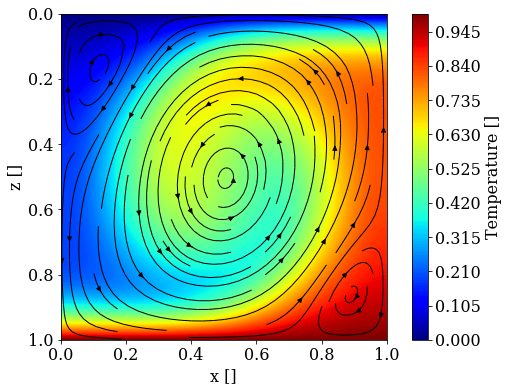

In [12]:
# Filled contour of the temperature distribution 
# and quiver plot of the velocity field
pyplot.figure(figsize=(7.5, 6.0))
pyplot.xlabel('x []')
pyplot.ylabel('z []')
levels = numpy.linspace(numpy.min(T), numpy.max(T), num=201)
contf = pyplot.contourf(x, z, T, levels=levels, cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature []')

# define new spatial sample interval for quiver plot
pyplot.streamplot(X, Z, u, w, linewidth=1, color='k')
pyplot.axis('scaled', adjustable='box');
pyplot.gca().invert_yaxis()
pyplot.xlim(0,Lx)

The resulting temperature and velocity field for `Ra=1e5` after 10000 iterations of the steepest descent method shows a convection roll rotating in counter-clockwise direction. Hot material is rising at the right boundary, cools at the top and descends at the left boundary, to be heated again at the bottom. 

##### Exercise 2 

Compare the numerical solution of eqs. (3) above with the stationary solutions, you computed for the Lorenz problem in [this notebook](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/03_Lorenz_equations/02_Stationary_solutions_of_DE.ipynb) for a Rayleighnumber 28x larger than the critical Rayleighnumber. You might have noticed, that the convergence criterion of the `mantle_convection_bvp` modelling code was not satisfied after `niter=10000` iterations. Run the code again with `niter=20000`. Visualize the results, compare them again with the stationary solutions of the Lorenz equations. Make an assumption, why the abortion criterion was still not satisfied after 20000 iterations. Hint: remember the dynamical evolution of the Lorenz equations for different Rayleighnumbers, you computed in [this notebook](https://nbviewer.jupyter.org/github/daniel-koehn/Differential-equations-earth-system/blob/master/03_Lorenz_equations/03_LorenzEquations_fdsolve.ipynb).

In [ ]:
# Define maximum number of iterations niter and tolerance tol
niter = 20000
tol = 1e-4

# Define Rayleigh number []
Ra = 1e5

# Compute temperature, streamfunction and temperature distribution
T, w, psi = mantle_convection_bvp(T0, psi0, w0, niter, dx, dz, Ra, tol)

In order to visualize the temperature and velocity fields, we first compute the velocities from the streamfunction ...

In [ ]:
u, w = stream2uw(psi,nx,nz,dx,dz)

... and use the `quiver` function to plot the velocity field and `contourf` to plot the temperature

In [ ]:
# Filled contour of the temperature distribution 
# and quiver plot of the velocity field
pyplot.figure(figsize=(7.5, 6.0))
pyplot.xlabel('x []')
pyplot.ylabel('z []')
levels = numpy.linspace(numpy.min(T), numpy.max(T), num=201)
contf = pyplot.contourf(x, z, T, levels=levels, cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature []')

# define new spatial sample interval for quiver plot
pyplot.streamplot(X, Z, u, w, linewidth=1, color='k')
pyplot.axis('scaled', adjustable='box');
pyplot.gca().invert_yaxis()
pyplot.xlim(0,Lx)

##### Exercise 3

What happens if you set the Rayleighnumber below the critical Rayleigh number, let 's say to `Ra = 1e1`? Again, describe the modelling result and compare with the stationary solution of the Lorenz equation for sub-critical Rayleigh numbers.  

In [ ]:
# Define maximum number of iterations niter and tolerance tol
niter = 20000
tol = 1e-4

# Define Rayleigh number []
Ra = 1e1

# Compute temperature, streamfunction and temperature distribution
T, w, psi = mantle_convection_bvp(T0, psi0, w0, niter, dx, dz, Ra, tol)

In order to visualize the temperature and velocity fields, we first compute the velocities from the streamfunction ...

In [ ]:
u, w = stream2uw(psi,nx,nz,dx,dz)

... and use the `quiver` function to plot the velocity field and `contourf` to plot the temperature

In [ ]:
# Filled contour of the temperature distribution 
# and quiver plot of the velocity field
pyplot.figure(figsize=(7.5, 6.0))
pyplot.xlabel('x []')
pyplot.ylabel('z []')
levels = numpy.linspace(numpy.min(T), numpy.max(T), num=201)
contf = pyplot.contourf(x, z, T, levels=levels, cmap='jet')
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature []')

# define new spatial sample interval for quiver plot
pyplot.streamplot(X, Z, u, w, linewidth=1, color='k')
pyplot.axis('scaled', adjustable='box');
pyplot.gca().invert_yaxis()
pyplot.xlim(0,Lx)

## What we learned:

* How to compute and visualize steady state solutions for the 2D thermal convection problem using the steepest descent method.